In [1]:
import os 
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 

from sklearn.model_selection import train_test_split
from PIL import Image 

In [2]:
filenames = os.listdir(r'datasets/cifar-10/train/')

In [3]:
len(filenames)

50000

In [4]:
type(filenames)

list

In [5]:
print(filenames[0:5])

['1.png', '10.png', '100.png', '1000.png', '10000.png']


In [6]:
## Labels Processing 

In [7]:
labels_df = pd.read_csv('datasets/cifar-10/trainLabels.csv')

In [8]:
labels_df.shape 

(50000, 2)

In [9]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [10]:
## here id is the name of the files.

In [11]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [12]:
## reading the images in order and converting them to numpy array 

In [13]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [14]:
labels_dictionary = {'airplane' : 0, 'automobile' :1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [15]:
labels[0:5]

[6, 9, 9, 4, 1]

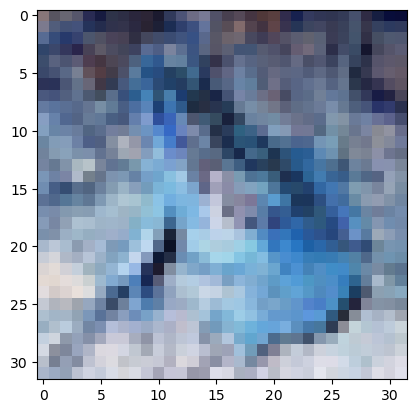

In [18]:
import cv2


img = cv2.imread('datasets/cifar-10/train/7796.png')

plt.imshow(img)


In [20]:
id_list = list(labels_df['id'])

In [23]:
train_data_folder = r'datasets/cifar-10/train/'

data = []

for id in id_list:
    img_path = train_data_folder + str(id) + '.png'
    image = Image.open(img_path)
    image = np.array(image)
    data.append(image)

In [24]:
data[0].shape


(32, 32, 3)

In [25]:
X = np.array(data)
Y = np.array(labels)

In [27]:
type(Y)

numpy.ndarray

In [29]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [31]:
 X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size  = 0.2, random_state = 23)
    
    
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(40000, 32, 32, 3) (10000, 32, 32, 3) (40000,) (10000,)


In [32]:
## scaling the values of pixels 

X_train_scaled = X_train /255
X_test_scaled = X_test / 255

In [33]:
## Building the Neural Network 

import tensorflow as tf 
from tensorflow import keras 

In [34]:
num_of_classes = 10


model = keras.Sequential([
    
    keras.layers.Flatten(input_shape= (32,32,3)),
    keras.layers.Dense(64, activation ='relu'),
    keras.layers.Dense(num_of_classes, activation = 'softmax')
    
])

C:\Users\HP-PC\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [38]:
model.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.2669 - loss: 1.9073 - val_acc: 0.2467 - val_loss: 1.9327
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.2611 - loss: 1.9097 - val_acc: 0.2385 - val_loss: 1.9313
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.2614 - loss: 1.9138 - val_acc: 0.2473 - val_loss: 1.9409
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.2638 - loss: 1.9066 - val_acc: 0.2407 - val_loss: 1.9445
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.2616 - loss: 1.9114 - val_acc: 0.2447 - val_loss: 1.9344
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.2639 - loss: 1.9074 - val_acc: 0.2537 - val_loss: 1.9290
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.2613 - loss: 1.9051 - val_acc: 0.2550 - val_loss: 1.9384
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.2575 - loss: 1.9162 - val_acc: 0.2438 - val_loss: 1.9357
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

In [43]:
## ResNet50 

from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [44]:
convolutional_base = ResNet50(weights = 'imagenet', include_top = False, input_shape=(256, 256, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 120s 1us/step


In [45]:
convolutional_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [48]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes , activation = 'relu'))

In [62]:
learning_rate = 2e-5
model.compile(optimizer=optimizers.RMSprop(learning_rate = learning_rate), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [63]:
history = model.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8216s 7s/step - acc: 0.1646 - loss: 7.5007 - val_acc: 0.4748 - val_loss: 3.8053
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7966s 7s/step - acc: 0.2985 - loss: 5.0917 - val_acc: 0.6090 - val_loss: 2.6657
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7742s 7s/step - acc: 0.3648 - loss: 4.2277 - val_acc: 0.6520 - val_loss: 2.4601
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8132s 7s/step - acc: 0.4124 - loss: 3.7623 - val_acc: 0.6370 - val_loss: 3.3513
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8314s 7s/step - acc: 0.4487 - loss: 3.2869 - val_acc: 0.7180 - val_loss: 1.7969
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7668s 7s/step - acc: 0.4938 - loss: 2.9364 - val_acc: 0.7502 - val_loss: 1.5263
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7442s 7s/step - acc: 0.5204 - loss: 2.6762 - val_acc: 0.7735 - val_loss: 1.4795
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7457s 7s/step - acc: 0.5672 - loss: 2.4014 - val_acc: 0.7717 - val_loss: 1.5564
Epoch 9/10
1125/1125 ━━━

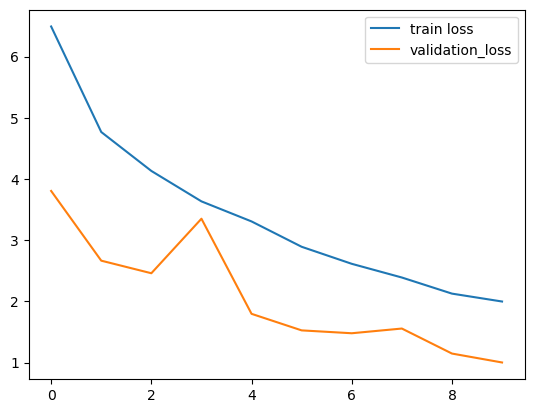

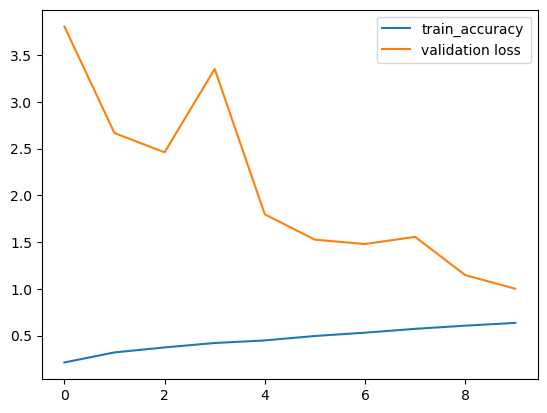

In [65]:
h = history

# plot the loss value 

plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()


## plot the accuracy value 

plt.plot(h.history['acc'], label = 'train_accuracy')
plt.plot(h.history['val_loss'], label = 'validation loss ')
plt.legend()
plt.show()

In [66]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)

print('Test Accuracy : ', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 456s 1s/step - acc: 0.8404 - loss: 0.9645
Test Accuracy :  0.8410999774932861
